- Loading the training and testing instances from the dump

In [7]:
import pickle


picklefile_tX = open('../dump/training_features.pickle', 'rb')
training_features = pickle.load(picklefile_tX)
picklefile_tY = open('../dump/training_labels.pickle', 'rb')
training_labels = pickle.load(picklefile_tY)

picklefile_TX = open('../dump/testing_features.pickle', 'rb')
testing_features = pickle.load(picklefile_TX)
picklefile_TY = open('../dump/testing_labels.pickle', 'rb')
testing_labels = pickle.load(picklefile_TY)


picklefile_tX.close()
picklefile_tY.close()
picklefile_TX.close()
picklefile_TY.close()

- Using logsitic regression

C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0. 1.]
Accuracy: 73.17073170731707
Precision:  78.35803477652003
Recall:  73.17073170731707
FScore:  73.62191459752435


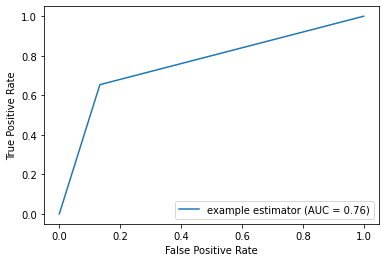

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
from sklearn import metrics


LRegression = LogisticRegression().fit(training_features, training_labels)

prediction_LRegression = LRegression.predict(testing_features)

print(np.unique(prediction_LRegression))

acc_log_reg = accuracy_score(prediction_LRegression, testing_labels) * 100

print("Accuracy:", acc_log_reg)

precision, recall, fscore, support = precision_recall_fscore_support(testing_labels, prediction_LRegression, average='weighted')

print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("FScore: ", fscore*100)
# print("Support: ", support*100)


fpr, tpr, thresholds = metrics.roc_curve(testing_labels, prediction_LRegression)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show() 

- Using Random Forest Classifier

C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


[0. 1.]
Accuracy: 97.5609756097561
Precision:  97.71341463414635
Recall:  97.5609756097561
FScore:  97.57640270899861


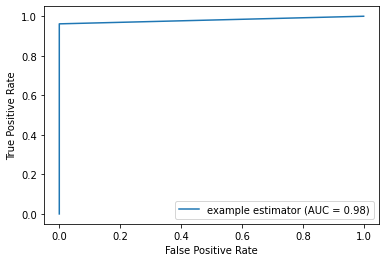

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import metrics

# y = np.array([0, 0, 1, 1])
# pred = np.array([0.1, 0.4, 0.35, 0.8])


RF_classifier = RandomForestClassifier(n_estimators=20, random_state=0)
RF_classifier.fit(training_features, training_labels)
y_pred = RF_classifier.predict(testing_features)

print(np.unique(y_pred))

acc_rf_classifier = (1 - metrics.mean_absolute_error(testing_labels, y_pred)) * 100

print('Accuracy:', acc_rf_classifier)

precision, recall, fscore, support = precision_recall_fscore_support(testing_labels, y_pred, average='weighted')

print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("FScore: ", fscore*100)
# print("Support: ", support*100)

fpr, tpr, thresholds = metrics.roc_curve(testing_labels, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show() 

- Using XGBoost Classifier

C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 100.00%
Precision:  100.0
Recall:  100.0
FScore:  100.0


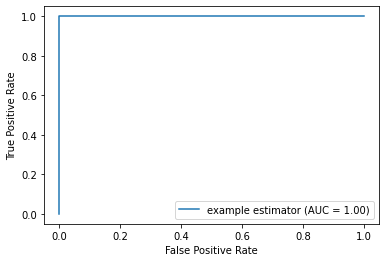

In [10]:
from xgboost import XGBClassifier

model = XGBClassifier()

# print(model)

model.fit(training_features, training_labels)

y_pred = model.predict(testing_features)
predictions = [round(value) for value in y_pred]

# print(predictions)
# print(testing_labels)

# evaluate predictions
acc_XGB_classifier = accuracy_score(testing_labels, predictions) * 100
print("Accuracy: %.2f%%" % (acc_XGB_classifier))

precision, recall, fscore, support = precision_recall_fscore_support(testing_labels, y_pred, average='weighted')

print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("FScore: ", fscore*100)
# print("Support: ", support*100)

fpr, tpr, thresholds = metrics.roc_curve(testing_labels, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

- Using Neural Networks

In [11]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.python.keras.layers import Dropout
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(64, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(32, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(16, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(8, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(4, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'he_uniform', activation='sigmoid'))

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# Compiling the ANN
classifier.compile(loss='BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])


"""
#######################################################
                TENSORBOARD - Starts
#######################################################
"""

tensorboard = TensorBoard(log_dir='../logs/{}'.format(int(time.time())))


# basic_model.save \
#     ('C:/Users/shad_/Desktop/2. Fall 2020/CSE 6211 (Deep Learning)/Submission/Project/Covid Detection with UNet/models/basic_model')

"""
#######################################################
                TENSORBOARD - Ends
#######################################################
"""

# Fitting the ANN to the Training set
model_history=classifier.fit(
    training_features.values, 
    training_labels.values, 
    validation_split=0.20,
    epochs = 1000,
    callbacks=[tensorboard]
)

Epoch 1/1000
11/11 [==============================] - 2s 75ms/step - loss: 0.7180 - accuracy: 0.6265 - val_loss: 1.1718 - val_accuracy: 0.0000e+00
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6765 - accuracy: 0.6265 - val_loss: 1.0465 - val_accuracy: 0.0000e+00
Epoch 3/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6592 - accuracy: 0.6296 - val_loss: 0.9578 - val_accuracy: 0.0610
Epoch 4/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6531 - accuracy: 0.6420 - val_loss: 0.9406 - val_accuracy: 0.0610
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6420 - val_loss: 0.9506 - val_accuracy: 0.0610
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6470 - accuracy: 0.6451 - val_loss: 0.9721 - val_accuracy: 0.0854
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6443 - accuracy: 0.6420 - val_loss: 0.9464 - val_accuracy: 0.10

11/11 [==============================] - 0s 8ms/step - loss: 0.4369 - accuracy: 0.7994 - val_loss: 0.7193 - val_accuracy: 0.5610
Epoch 116/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.4366 - accuracy: 0.8148 - val_loss: 0.7584 - val_accuracy: 0.4878
Epoch 117/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.4358 - accuracy: 0.8086 - val_loss: 0.6050 - val_accuracy: 0.7561
Epoch 118/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.4486 - accuracy: 0.7870 - val_loss: 0.4771 - val_accuracy: 0.8537
Epoch 119/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.4394 - accuracy: 0.8210 - val_loss: 0.7278 - val_accuracy: 0.5244
Epoch 120/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.4333 - accuracy: 0.8086 - val_loss: 0.8806 - val_accuracy: 0.4268
Epoch 121/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.4305 - accuracy: 0.7963 - val_loss: 0.6575 - val_accuracy: 0.6829
Epoch 1

Epoch 172/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.4096 - accuracy: 0.8302 - val_loss: 0.6007 - val_accuracy: 0.7805
Epoch 173/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3763 - accuracy: 0.8549 - val_loss: 0.4644 - val_accuracy: 0.8293
Epoch 174/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3839 - accuracy: 0.8302 - val_loss: 0.8190 - val_accuracy: 0.5122
Epoch 175/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.3760 - accuracy: 0.8395 - val_loss: 0.7667 - val_accuracy: 0.5610
Epoch 176/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.3776 - accuracy: 0.8395 - val_loss: 0.3696 - val_accuracy: 0.8902
Epoch 177/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3913 - accuracy: 0.8272 - val_loss: 0.4399 - val_accuracy: 0.8537
Epoch 178/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3797 - accuracy: 0.8395 - val_loss: 0.6421 - val_accuracy:

Epoch 229/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.3202 - accuracy: 0.8951 - val_loss: 0.5475 - val_accuracy: 0.7805
Epoch 230/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3276 - accuracy: 0.8827 - val_loss: 0.4385 - val_accuracy: 0.8171
Epoch 231/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.3372 - accuracy: 0.8611 - val_loss: 0.8440 - val_accuracy: 0.5976
Epoch 232/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.3202 - accuracy: 0.8765 - val_loss: 0.2866 - val_accuracy: 0.9146
Epoch 233/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.3308 - accuracy: 0.8827 - val_loss: 0.3467 - val_accuracy: 0.9146
Epoch 234/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.3472 - accuracy: 0.8642 - val_loss: 0.6107 - val_accuracy: 0.7073
Epoch 235/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3159 - accuracy: 0.8889 - val_loss: 0.9108 - val_accuracy:

Epoch 286/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.2915 - accuracy: 0.8827 - val_loss: 0.2615 - val_accuracy: 0.9146
Epoch 287/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3161 - accuracy: 0.8735 - val_loss: 0.2974 - val_accuracy: 0.9146
Epoch 288/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3043 - accuracy: 0.8827 - val_loss: 0.5223 - val_accuracy: 0.8415
Epoch 289/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.2693 - accuracy: 0.9012 - val_loss: 0.4477 - val_accuracy: 0.8415
Epoch 290/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.2618 - accuracy: 0.9074 - val_loss: 0.5818 - val_accuracy: 0.7927
Epoch 291/1000
11/11 [==============================] - ETA: 0s - loss: 0.4054 - accuracy: 0.81 - 0s 7ms/step - loss: 0.2968 - accuracy: 0.8827 - val_loss: 0.5200 - val_accuracy: 0.8415
Epoch 292/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.2758 - accuracy:

Epoch 399/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1876 - accuracy: 0.9259 - val_loss: 0.3823 - val_accuracy: 0.8902
Epoch 400/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1937 - accuracy: 0.9352 - val_loss: 0.5020 - val_accuracy: 0.8780
Epoch 401/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1997 - accuracy: 0.9290 - val_loss: 0.5845 - val_accuracy: 0.8415
Epoch 402/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.1932 - accuracy: 0.9259 - val_loss: 0.5626 - val_accuracy: 0.8537
Epoch 403/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.2116 - accuracy: 0.9228 - val_loss: 0.5660 - val_accuracy: 0.8780
Epoch 404/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.9074 - val_loss: 0.5994 - val_accuracy: 0.8415
Epoch 405/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1817 - accuracy: 0.9352 - val_loss: 0.4017 - val_accuracy:

Epoch 456/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1652 - accuracy: 0.9321 - val_loss: 0.5425 - val_accuracy: 0.8780
Epoch 457/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1477 - accuracy: 0.9475 - val_loss: 0.3274 - val_accuracy: 0.9512
Epoch 458/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1891 - accuracy: 0.9228 - val_loss: 0.4950 - val_accuracy: 0.8537
Epoch 459/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1438 - accuracy: 0.9444 - val_loss: 0.4890 - val_accuracy: 0.8537
Epoch 460/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1558 - accuracy: 0.9321 - val_loss: 0.3869 - val_accuracy: 0.9024
Epoch 461/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1537 - accuracy: 0.9537 - val_loss: 0.4032 - val_accuracy: 0.9024
Epoch 462/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1566 - accuracy: 0.9506 - val_loss: 0.3845 - val_accuracy:

Epoch 513/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1213 - accuracy: 0.9537 - val_loss: 0.4976 - val_accuracy: 0.8659
Epoch 514/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1178 - accuracy: 0.9444 - val_loss: 0.5717 - val_accuracy: 0.8902
Epoch 515/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1137 - accuracy: 0.9660 - val_loss: 0.7472 - val_accuracy: 0.8049
Epoch 516/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1108 - accuracy: 0.9568 - val_loss: 0.5627 - val_accuracy: 0.8780
Epoch 517/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1185 - accuracy: 0.9568 - val_loss: 0.5257 - val_accuracy: 0.8537
Epoch 518/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1099 - accuracy: 0.9568 - val_loss: 0.3514 - val_accuracy: 0.9024
Epoch 519/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1464 - accuracy: 0.9414 - val_loss: 2.5803 - val_accuracy:

Epoch 570/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0975 - accuracy: 0.9722 - val_loss: 0.3551 - val_accuracy: 0.9146
Epoch 571/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1195 - accuracy: 0.9630 - val_loss: 0.6190 - val_accuracy: 0.8659
Epoch 572/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0966 - accuracy: 0.9753 - val_loss: 4.7505 - val_accuracy: 0.2195
Epoch 573/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.3612 - accuracy: 0.8981 - val_loss: 1.5530 - val_accuracy: 0.4634
Epoch 574/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.1952 - accuracy: 0.9167 - val_loss: 0.5469 - val_accuracy: 0.9024
Epoch 575/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1031 - accuracy: 0.9660 - val_loss: 0.5658 - val_accuracy: 0.8902
Epoch 576/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0953 - accuracy: 0.9660 - val_loss: 0.6317 - val_accuracy:

Epoch 627/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0812 - accuracy: 0.9691 - val_loss: 0.5862 - val_accuracy: 0.9024
Epoch 628/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.0764 - accuracy: 0.9784 - val_loss: 0.3949 - val_accuracy: 0.9512
Epoch 629/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0774 - accuracy: 0.9815 - val_loss: 1.1450 - val_accuracy: 0.6341
Epoch 630/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1028 - accuracy: 0.9568 - val_loss: 0.5169 - val_accuracy: 0.9024
Epoch 631/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0878 - accuracy: 0.9660 - val_loss: 0.3310 - val_accuracy: 0.9512
Epoch 632/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0966 - accuracy: 0.9660 - val_loss: 0.5386 - val_accuracy: 0.9024
Epoch 633/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0751 - accuracy: 0.9691 - val_loss: 0.4307 - val_accuracy:

Epoch 684/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0700 - accuracy: 0.9753 - val_loss: 0.6899 - val_accuracy: 0.9024
Epoch 685/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.3717 - val_accuracy: 0.9512
Epoch 686/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0678 - accuracy: 0.9722 - val_loss: 0.5808 - val_accuracy: 0.9024
Epoch 687/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.5152 - val_accuracy: 0.9024
Epoch 688/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0638 - accuracy: 0.9753 - val_loss: 1.0014 - val_accuracy: 0.8049
Epoch 689/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.0847 - accuracy: 0.9691 - val_loss: 0.5615 - val_accuracy: 0.9024
Epoch 690/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0607 - accuracy: 0.9815 - val_loss: 0.5088 - val_accuracy:

Epoch 741/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0554 - accuracy: 0.9846 - val_loss: 0.7755 - val_accuracy: 0.9024
Epoch 742/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0640 - accuracy: 0.9784 - val_loss: 0.7329 - val_accuracy: 0.9024
Epoch 743/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.6180 - val_accuracy: 0.9024
Epoch 744/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.3866 - val_accuracy: 0.9146
Epoch 745/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0633 - accuracy: 0.9815 - val_loss: 0.5943 - val_accuracy: 0.9024
Epoch 746/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0601 - accuracy: 0.9784 - val_loss: 0.3539 - val_accuracy: 0.9512
Epoch 747/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1002 - accuracy: 0.9660 - val_loss: 0.5306 - val_accuracy:

Epoch 798/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0463 - accuracy: 0.9907 - val_loss: 0.5640 - val_accuracy: 0.9024
Epoch 799/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.0443 - accuracy: 0.9907 - val_loss: 0.5119 - val_accuracy: 0.9024
Epoch 800/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9877 - val_loss: 0.6100 - val_accuracy: 0.9024
Epoch 801/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0419 - accuracy: 0.9907 - val_loss: 0.6954 - val_accuracy: 0.9024
Epoch 802/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0453 - accuracy: 0.9877 - val_loss: 0.5221 - val_accuracy: 0.9024
Epoch 803/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0443 - accuracy: 0.9907 - val_loss: 0.7096 - val_accuracy: 0.9024
Epoch 804/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.7561 - val_accuracy:

Epoch 855/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0722 - accuracy: 0.9630 - val_loss: 0.6065 - val_accuracy: 0.9024
Epoch 856/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0614 - accuracy: 0.9877 - val_loss: 5.8946 - val_accuracy: 0.2805
Epoch 857/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.4520 - accuracy: 0.9043 - val_loss: 0.6272 - val_accuracy: 0.8902
Epoch 858/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0829 - accuracy: 0.9815 - val_loss: 0.9319 - val_accuracy: 0.8293
Epoch 859/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0792 - accuracy: 0.9815 - val_loss: 0.5781 - val_accuracy: 0.9024
Epoch 860/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0580 - accuracy: 0.9846 - val_loss: 0.4609 - val_accuracy: 0.9146
Epoch 861/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0583 - accuracy: 0.9877 - val_loss: 0.3201 - val_accuracy:

Epoch 912/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0366 - accuracy: 0.9938 - val_loss: 0.6509 - val_accuracy: 0.9024
Epoch 913/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0337 - accuracy: 0.9938 - val_loss: 0.7022 - val_accuracy: 0.9024
Epoch 914/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 0.9907 - val_loss: 0.6273 - val_accuracy: 0.9024
Epoch 915/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 0.9938 - val_loss: 0.7298 - val_accuracy: 0.9024
Epoch 916/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0422 - accuracy: 0.9907 - val_loss: 1.1617 - val_accuracy: 0.8049
Epoch 917/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.9907 - val_loss: 0.5751 - val_accuracy: 0.9024
Epoch 918/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0420 - accuracy: 0.9907 - val_loss: 0.6475 - val_accuracy:

Epoch 969/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0515 - accuracy: 0.9846 - val_loss: 0.5350 - val_accuracy: 0.9146
Epoch 970/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9938 - val_loss: 0.6451 - val_accuracy: 0.9146
Epoch 971/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0307 - accuracy: 0.9938 - val_loss: 0.6318 - val_accuracy: 0.9146
Epoch 972/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0321 - accuracy: 0.9969 - val_loss: 0.6763 - val_accuracy: 0.9146
Epoch 973/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.0322 - accuracy: 0.9938 - val_loss: 0.6423 - val_accuracy: 0.9146
Epoch 974/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.9907 - val_loss: 0.8192 - val_accuracy: 0.8902
Epoch 975/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0541 - accuracy: 0.9784 - val_loss: 0.6072 - val_accuracy:

- Evaluating the Neural Network

In [12]:
results = classifier.evaluate(training_features, training_labels, batch_size=128)
print("training loss, training acc:", results)

results = classifier.evaluate(testing_features, testing_labels, batch_size=128)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 4ms/step - loss: 0.1565 - accuracy: 0.9778
training loss, training acc: [0.15647993981838226, 0.9778324961662292]
1/1 [==============================] - 0s 34ms/step - loss: 0.4014 - accuracy: 0.9268
test loss, test acc: [0.40143486857414246, 0.9268292784690857]


In [13]:
acc_nn = classifier.evaluate(testing_features, testing_labels, batch_size=128)[1]*100

1/1 [==============================] - 0s 38ms/step - loss: 0.4014 - accuracy: 0.9268


Precision:  100.0
Recall:  100.0
FScore:  100.0


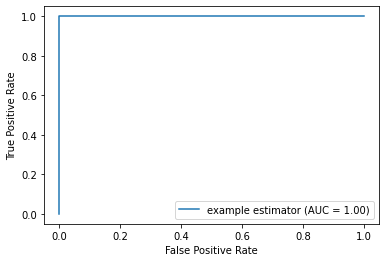

In [14]:
y_pred_nn = classifier.predict(testing_features)

for i, num in enumerate(y_pred_nn):
    y_pred_nn[i] = round(num[0])

# print(y_pred_nn)

precision, recall, fscore, support = precision_recall_fscore_support(testing_labels, y_pred, average='weighted')

accuracy_nn = accuracy_score(testing_labels, predictions) * 100

# print("Accuracy: ", accuracy_nn)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("FScore: ", fscore*100)
# print("Support: ", support*100)

fpr, tpr, thresholds = metrics.roc_curve(testing_labels, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show() 

- Printing the accuracy for each of the models

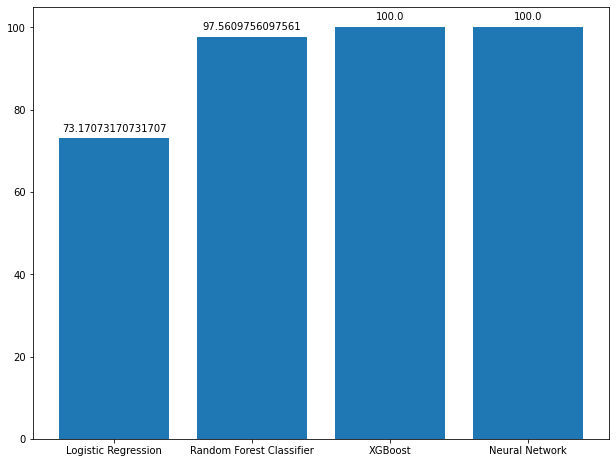

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])

# langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# students = [23,17,35,29,12]

x = ['Logistic Regression', 'Random Forest Classifier', 'XGBoost', 'Neural Network']
y = [acc_log_reg, acc_rf_classifier, acc_XGB_classifier, accuracy_nn]
# y = [acc_log_reg, 10, acc_XGB_classifier, acc_nn]

ax.bar(x, y)

# ax = result.plot(kind='bar', figsize=(15,4), width=0.8, color=colors_list, edgecolor=None)

#################################################################

for p in ax.patches:
#     print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

#################################################################

plt.show()